### Import libraries

##### Steps to follow:
1. Reading and understanding the data
2. Preparing data for modeling (split into train & test)
3. Training the model
4. Prediction and evaluation on the test data


In [8]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 1. Reading and understand the Dataset

In [9]:
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
print(lead_data.shape)

(9240, 37)


In [11]:
print(lead_data.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [12]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [13]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# 2. EDA

- The majority of the columns have an object data type, which we will convert accordingly.

In [14]:
# Function to print the unique values from the cols
def get_unique_vals(data_set):
    for col in data_set.columns:
        unique_values = data_set[col].unique()
        print(f"'{col}': {unique_values}\n")

get_unique_vals(lead_data)

'Prospect ID': ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

'Lead Number': [660737 660728 660727 ... 579545 579538 579533]

'Lead Origin': ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

'Lead Source': ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

'Do Not Email': ['No' 'Yes']

'Do Not Call': ['No' 'Yes']

'Converted': [0 1]

'TotalVisits': [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26. 

- In some of the columns, the "Select" value is observed, which might be due to the non-selection of the option. Hence, we can replace the select values with null values.

In [15]:
lead_data = lead_data.replace('Select', pd.NA)

- We have replaced "Select" with null values. Now, we can move ahead with handling missing values.

### 2.1. - Handle Missing Values

In [16]:
# identifying the null valus in data
print(lead_data.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [17]:
# Identify the null values as a percentage.
print(lead_data.isnull().sum()*100/len(lead_data))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

- Drop the columns with null values exceeding 40%.

In [18]:
# Function that will remove the columns having null values based on the cutoff
def drop_null_vals(data_set, cut_off):
    
    empty_vals = list(data_set.columns[100*data_set.isnull().mean() > cut_off])
    print(f"List of columns having more than {cut_off}% empty values: {empty_vals}\n")
    print(f"Total columns: {len(data_set.columns)}")
    print(f"Removed columns: {len(empty_vals)}")
    
    data_set = data_set.drop(empty_vals, axis=1)
    print(f"Remaining columns: {len(data_set.columns)}")
    
    return data_set

lead_data = drop_null_vals(lead_data, 40)


List of columns having more than 40% empty values: ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

Total columns: 37
Removed columns: 7
Remaining columns: 30


In [19]:
print(lead_data.shape)

(9240, 30)


In [20]:
print(lead_data.isnull().sum()*100/len(lead_data))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [21]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 2.2. - Categorical columns analysis

In [22]:
get_unique_vals(lead_data)

'Prospect ID': ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

'Lead Number': [660737 660728 660727 ... 579545 579538 579533]

'Lead Origin': ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

'Lead Source': ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

'Do Not Email': ['No' 'Yes']

'Do Not Call': ['No' 'Yes']

'Converted': [0 1]

'TotalVisits': [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26. 

In [23]:
# List of categorical columns
catagorical_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 
                    'What matters most to you in choosing a course', 'Tags', 'City', 'Last Notable Activity']

In [24]:
# List of columns to remove
cols_to_remove = []

In [25]:
# Function that will create graph of the variable
def create_plot(col_name, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    sns.countplot(x=col_name, hue='Converted', data=lead_data)
    plt.xticks(rotation=90)
    return plt.show()

- We have created a list of catagorical variables.
- We have created a empty list to remove columns that are not important for the analysis, we will append the columns accordingly
- We have created a function to create plot of the variable
- Now we will look into each column one by one for analysis.

**1. Lead Origin**

In [26]:
# Check the unique values of the variable
lead_data['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [27]:
# Check the value count of the variable
lead_data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

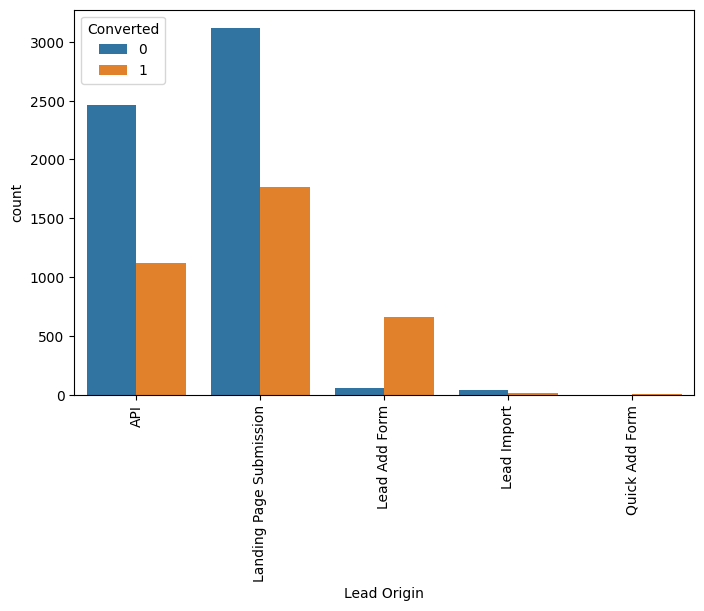

In [28]:
create_plot('Lead Origin', figsize=(8, 5))

**Conclusion:**
1. "Landing page submissions" and "API" have identified the most leads, and the majority of the leads converted from these sources.
2. "Lead Add Form" has a high lead conversion rate but the total identifies leads is less compared to "Landing page submissions" and "API".
3. "Lead Import" and "Quick Add Form" have gathered the least leads and have very low conversion rates.
4. We can focus on improving the conversion rate of "API" and "Landing page submissions".

**2. Lead Source**

In [29]:
# Check the unique values of the variable
lead_data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [30]:
# Check the value count of the variable
lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- As we can see, there are many lead sources, some of which have collected very few leads.
- Therefore, we will keep the top 5 lead sources in their original form and replace the values of the others with "Others".
- We will also replace the null values with "Others"

In [31]:
# Replace the values with others
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google', 'Click2call', 
                                                             'Press_Release', 'Social Media', 'Live Chat', 'youtubechannel', 'testone', 
                                                             'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'], 'other_lead_sources')

In [32]:
# Replace the null values with others
lead_data['Lead Source'] = lead_data['Lead Source'].fillna('other_lead_sources')

In [33]:
# Check the value count of the variable
lead_data['Lead Source'].value_counts(dropna=False)

Google                2868
Direct Traffic        2543
Olark Chat            1755
Organic Search        1154
Reference              534
other_lead_sources     386
Name: Lead Source, dtype: int64

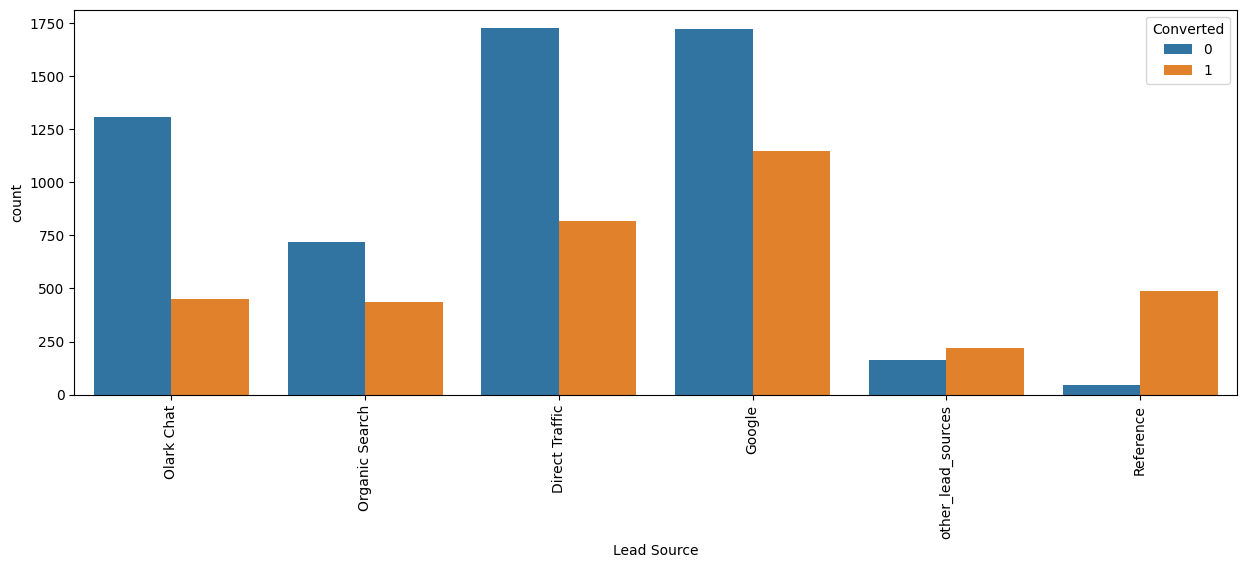

In [34]:
# Create plot for better understanding
create_plot("Lead Source")

**Conclusion:**
1. "Direct traffic" and "Google" have gathered the most leads and have the highest conversion rate.
2. "Olark chat" and "Organic search" have almost similar conversion rates, but the non-conversion rate is lower for "Organic search."
3. "Reference" has the highest conversion rate, and most of the leads successfully converted.
4. In order to improve the conversion rate, we should focus more on "Reference" by providing some kind of discount options to the referrals.
5. "Others" have a very low conversion rate.

**3. Last Activity**

In [35]:
# Check the unique values of the variable
lead_data['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [36]:
# Check the value count of the variable
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

- Here, we will keep the top 10 last activities in their original form and replace the values of the others with "Others".
- We will also replace the null values with "Others"

In [37]:
# Replace the values with others
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 
                                                                 'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 
                                                                 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'others')

In [38]:
# Replace the null values with others
lead_data['Last Activity'] = lead_data['Last Activity'].fillna('others')

In [39]:
# Check the value count of the variable
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

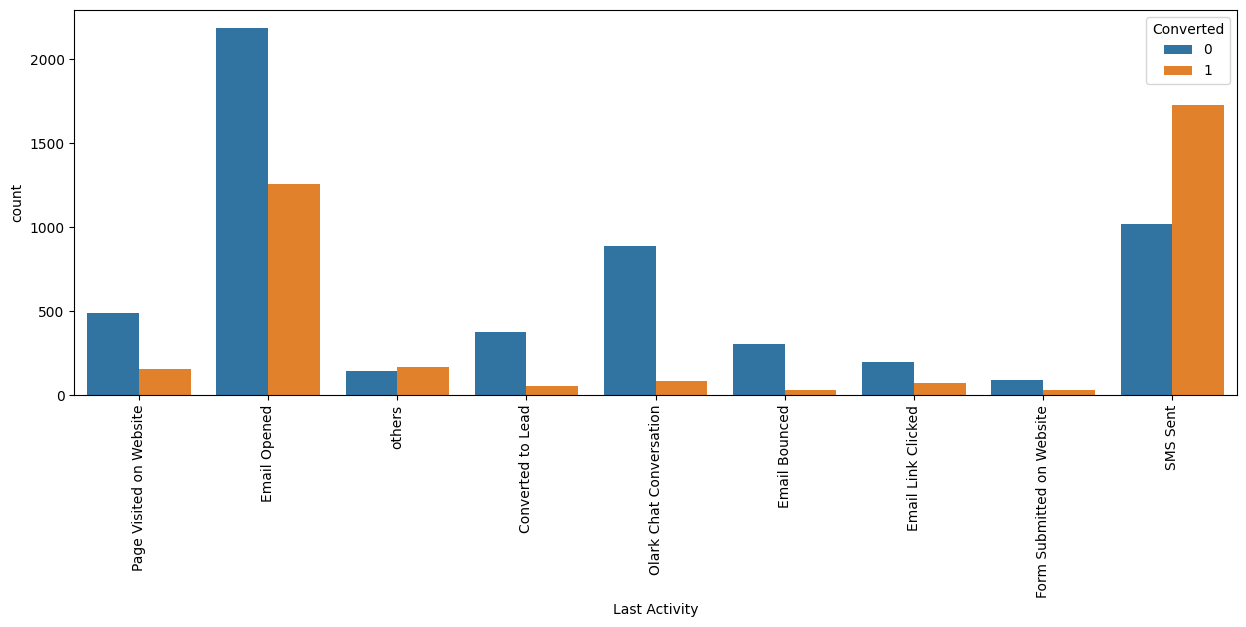

In [40]:
# Create plot for better understanding
create_plot("Last Activity")

**Conclusion:**
1. "Email Opened" and "SMS Sent" have the highest conversion rate.

**4. Country**

In [41]:
# Check the unique values of the variable
lead_data['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [42]:
# Check the value count of the variable
lead_data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

- Since majority of the leads are from india, hence we will replace the null values with india.
- We will replace the values of the other countries with "Others".

In [43]:
# Replace the values with others
lead_data['Country'] = lead_data['Country'].replace(['United Kingdom', 'Australia', 'Qatar', 'Bahrain', 'Hong Kong', 'Oman', 'France', 'unknown', 'Kuwait', 
                                                     'South Africa', 'Canada', 'Nigeria', 'Germany', 'Sweden', 'Philippines', 'Uganda', 'Italy', 'Bangladesh', 
                                                     'Netherlands', 'Asia/Pacific Region', 'China', 'Belgium', 'Ghana', 'Kenya', 'Sri Lanka', 'Tanzania', 
                                                     'Malaysia', 'Liberia', 'Switzerland', 'Denmark', 'Russia', 'Vietnam', 'Indonesia','United States', 
                                                     'United Arab Emirates', 'Singapore', 'Saudi Arabia'], 'Other_countries')

In [44]:
# Replace the null values with others
lead_data['Country'] = lead_data['Country'].fillna('India')

In [45]:
# Check the value count of the variable
lead_data['Country'].value_counts(dropna=False)

India              8953
Other_countries     287
Name: Country, dtype: int64

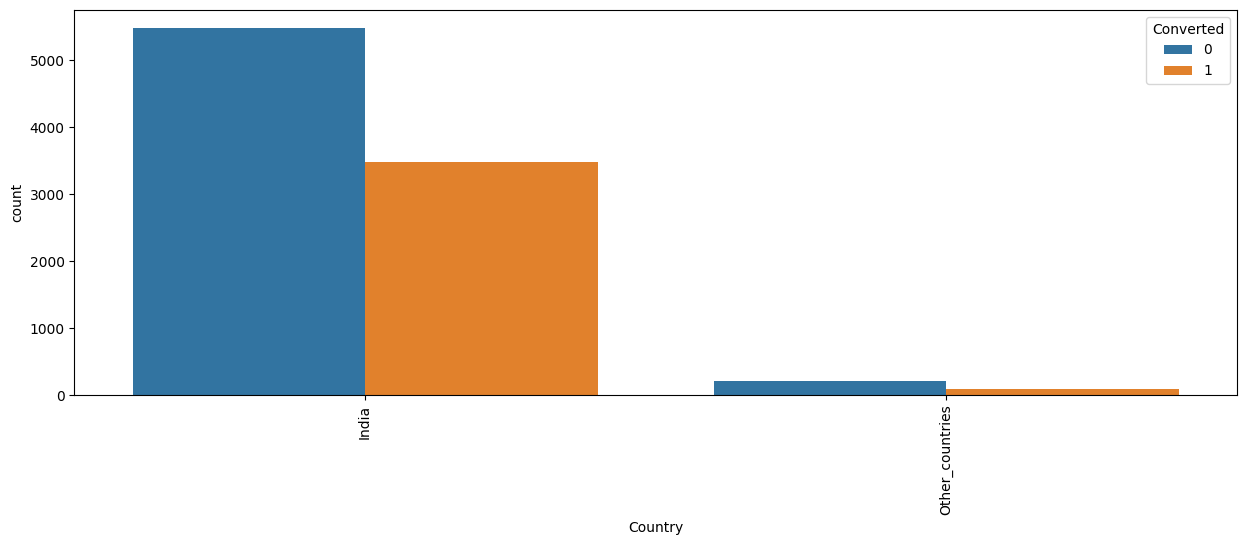

In [46]:
# Create plot for better understanding
create_plot("Country")

In [47]:
# Append the column name in empty list to drop it
cols_to_remove.append("Country")

**Conclusion:**
1. We can see that most of the leads are coming from india.
2. Since majority of the values in variable "Country" is "India", we can drop this variable.

**5. Specialization**

In [48]:
# Check the unique values of the variable
lead_data['Specialization'].unique()

array([<NA>, 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [49]:
# Check the value count of the variable
lead_data['Specialization'].value_counts(dropna=False)

<NA>                                 1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- As we can see the "<NA>" and "NaN" values are more, which means the "Specialization" was not specified during form filling process.
- We will replace the values of "<NA>" and "NaN" with "not_selected".

In [50]:
# Replace the null values with others
lead_data['Specialization'] = lead_data['Specialization'].fillna('not_selected')

In [51]:
# Check the value count of the variable
lead_data['Specialization'].value_counts(dropna=False)

not_selected                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

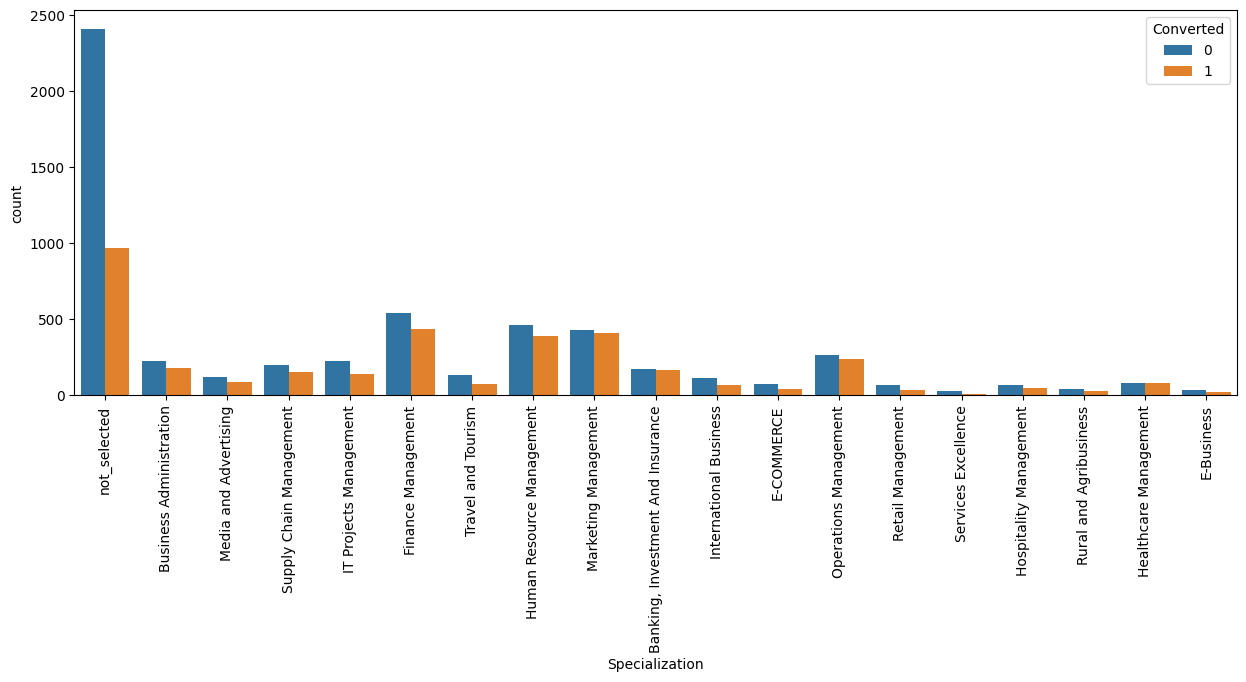

In [52]:
# Create plot for better understanding
create_plot("Specialization")

- We can see in the graph that the "Management" specialization have good convertion rate.
- We can bin all management "Management" specialization into one.

In [53]:
# Replace the values
lead_data['Specialization'] = lead_data['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management', 
                                                                   'Operations Management', 'IT Projects Management', 'Supply Chain Management', 
                                                                   'Healthcare Management', 'Hospitality Management', 'Retail Management'], 'management_specialization')

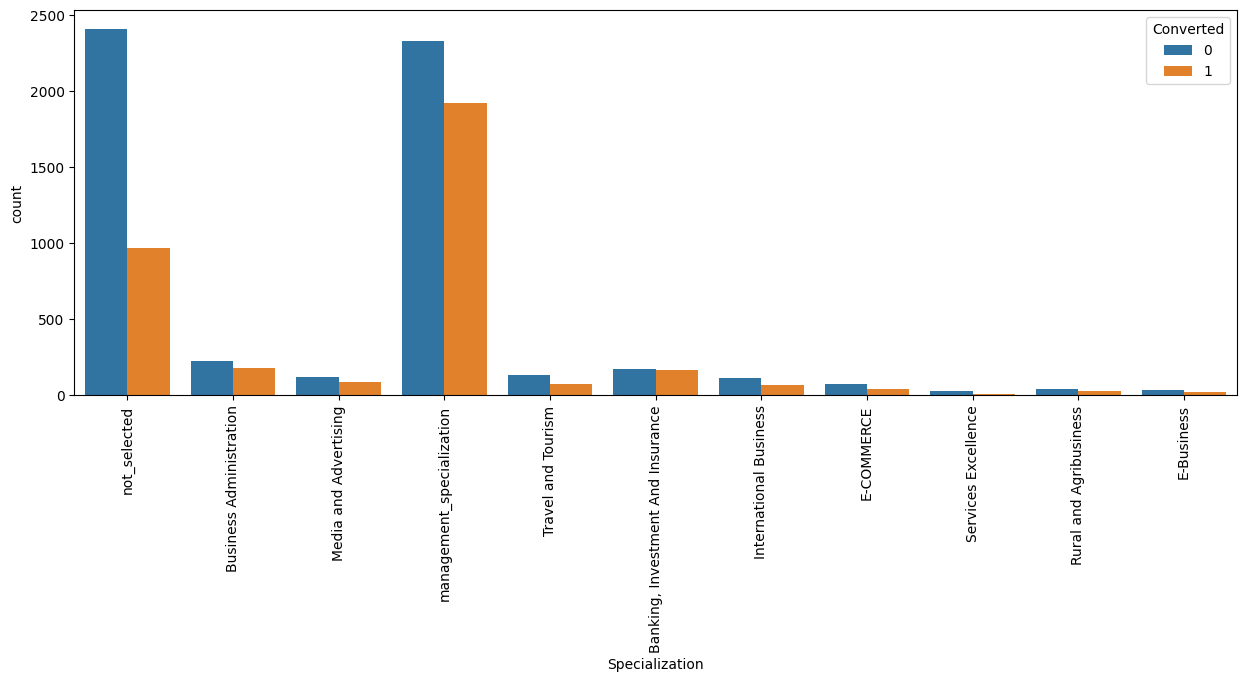

In [54]:
# Create plot for better understanding
create_plot("Specialization")

**Conclusion:**
1. As we can see the "management specialization" is a very significant variable for out analysis, It has very high convertion rate.
2. In order to improve the lead convertion rate, we can focus on targeting more individuals with a specialization in "Management" through marketing or referrals.

**6. What is your current occupation**

In [55]:
# Check the value count of the variable
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- We can replace the null values with "Unemployed"

In [56]:
# Replace the null values
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna('Unemployed')

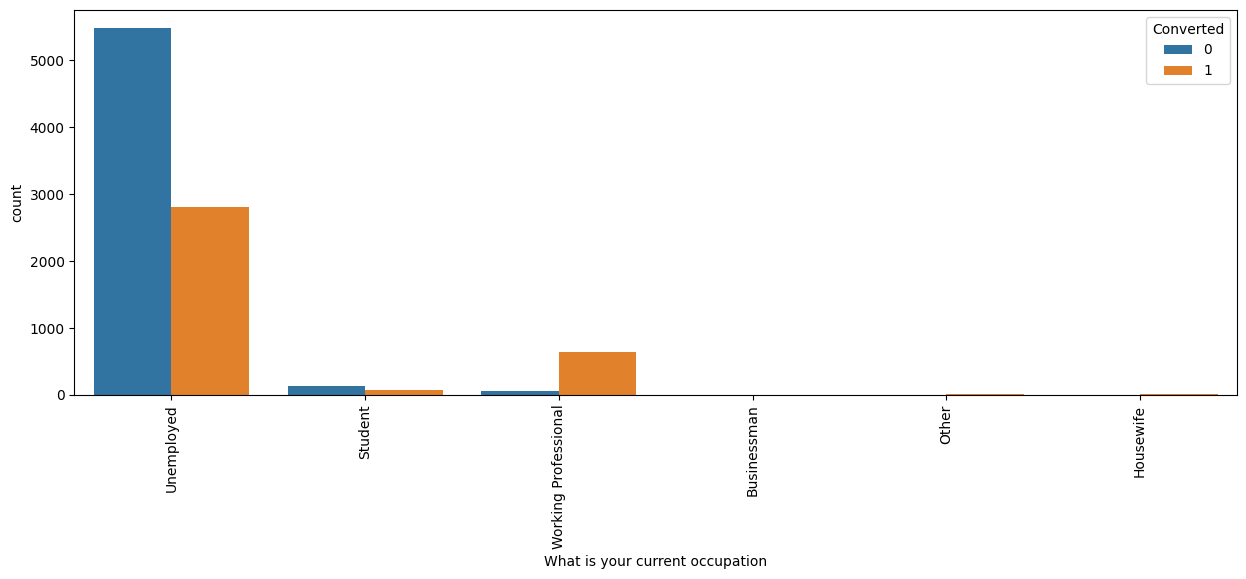

In [57]:
# Create plot for better understanding
create_plot("What is your current occupation")

**Conclusion:**
- As we can see, "Unemployed" and "Working Professional" categories exhibit a very high conversion rate, indicating a significant variable.
- We should primarily focus on working professionals since they have a higher conversion rate compared to the non-conversion rate.
- Unemployed individuals are also important as they might be upskilling themselves in order to seize opportunities.

**7. What matters most to you in choosing a course**

In [58]:
# Check the value count of the variable
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- We can replace the null values with "Better Career Prospects"

In [59]:
# Replace the null values
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].fillna('Better Career Prospects')

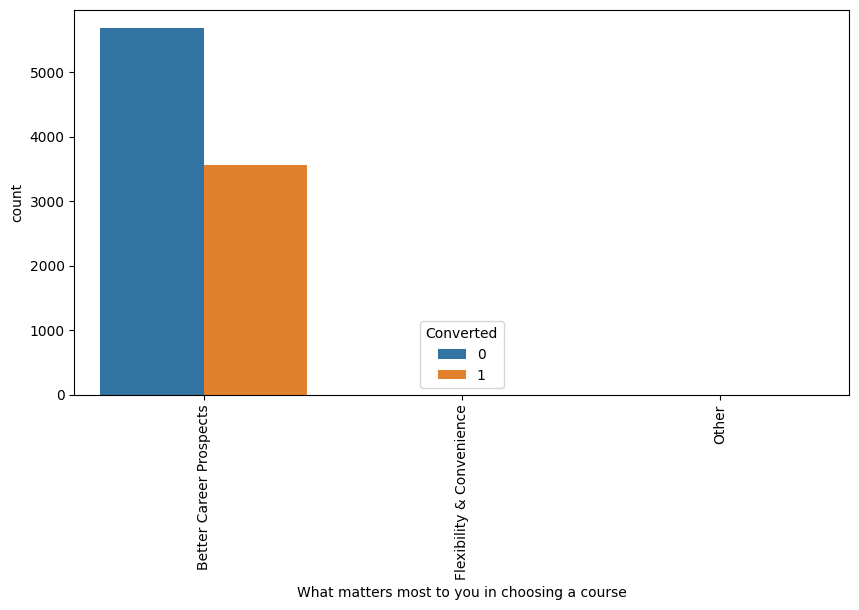

In [60]:
# Create plot for better understanding
create_plot("What matters most to you in choosing a course", figsize=(10, 5))

In [61]:
# Append the column name in empty list to drop it
cols_to_remove.append("What matters most to you in choosing a course")

**Conclusion:**
1. Since majority of the values in variable "What matters most to you in choosing a course" is "Better Career Prospects", we can drop this variable.

**8. Tags**

In [62]:
# Check the value count of the variable
lead_data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

- We will keep the top 5 tage and replace the remainig tages with the values "other_tags".
- we will also replace the null values with the values "other_tags".

In [63]:
# Replace the values
lead_data['Tags'] = lead_data['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA', 
                                               'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 
                                               'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 
                                               'Want to take admission but has financial', 'In confusion whether part time or DLP', 'Interested in Next batch', 
                                               'Lateral student', 'Shall take in the next coming month', 'University not recognized', 
                                               'Recognition issue (DEC approval)'], 'other_tags')

In [64]:
# Replace the null values
lead_data['Tags'] = lead_data['Tags'].fillna('other_tags')

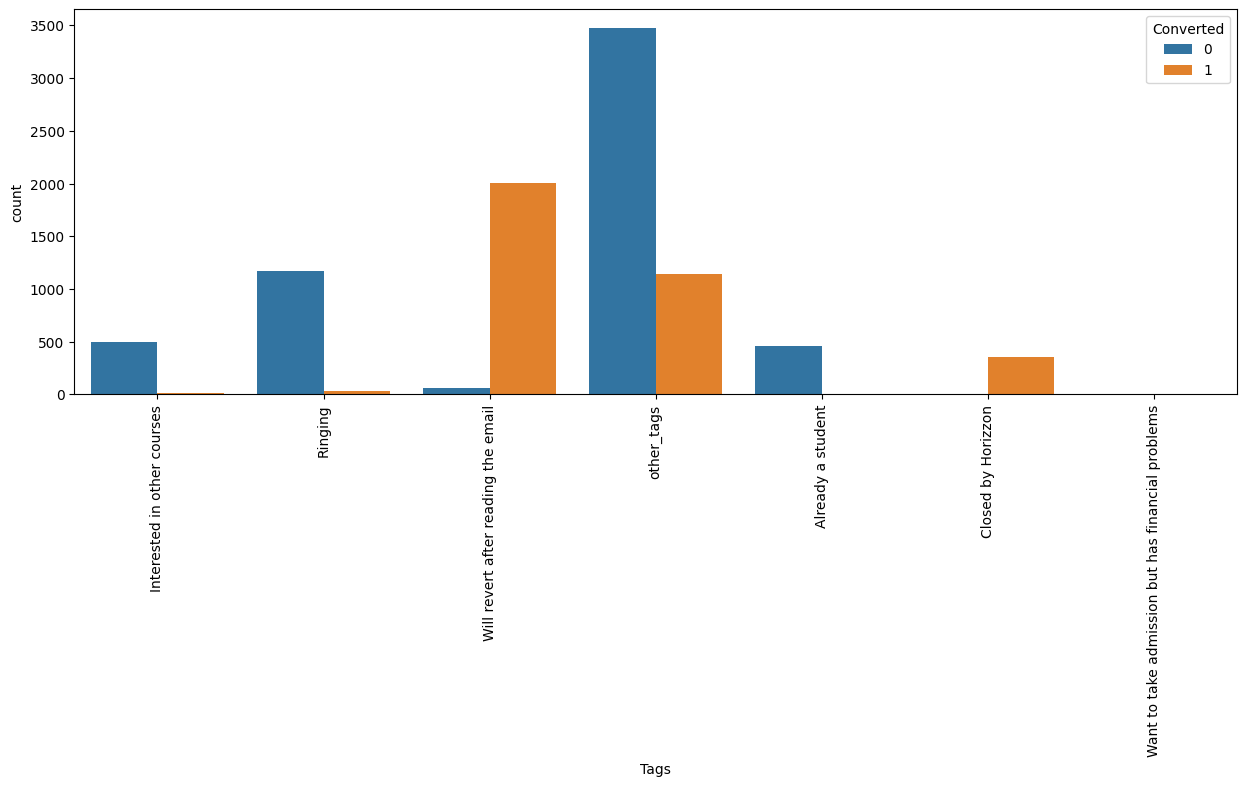

In [65]:
# Create plot for better understanding
create_plot("Tags")

**9. City**

In [66]:
# Check the value count of the variable
lead_data['City'].value_counts(dropna=False)

Mumbai                         3222
<NA>                           2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- We will replace the null values with "Mumbai" as it is appearing the highest

In [67]:
lead_data['City'] = lead_data['City'].fillna('Mumbai')

In [68]:
# Check the value count of the variable
lead_data['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

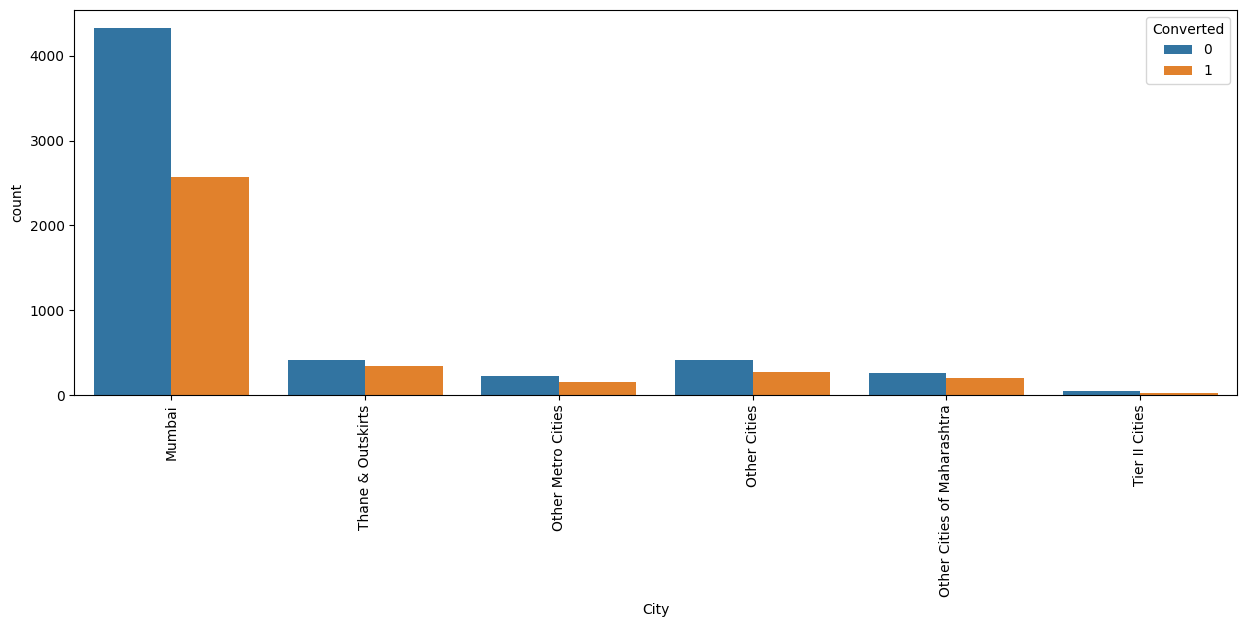

In [69]:
create_plot("City")

**Conclusion:**
1. Most of the leads are from "Mumbai".

**10. Last Notable Activity**

In [70]:
# Check the value count of the variable
lead_data['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

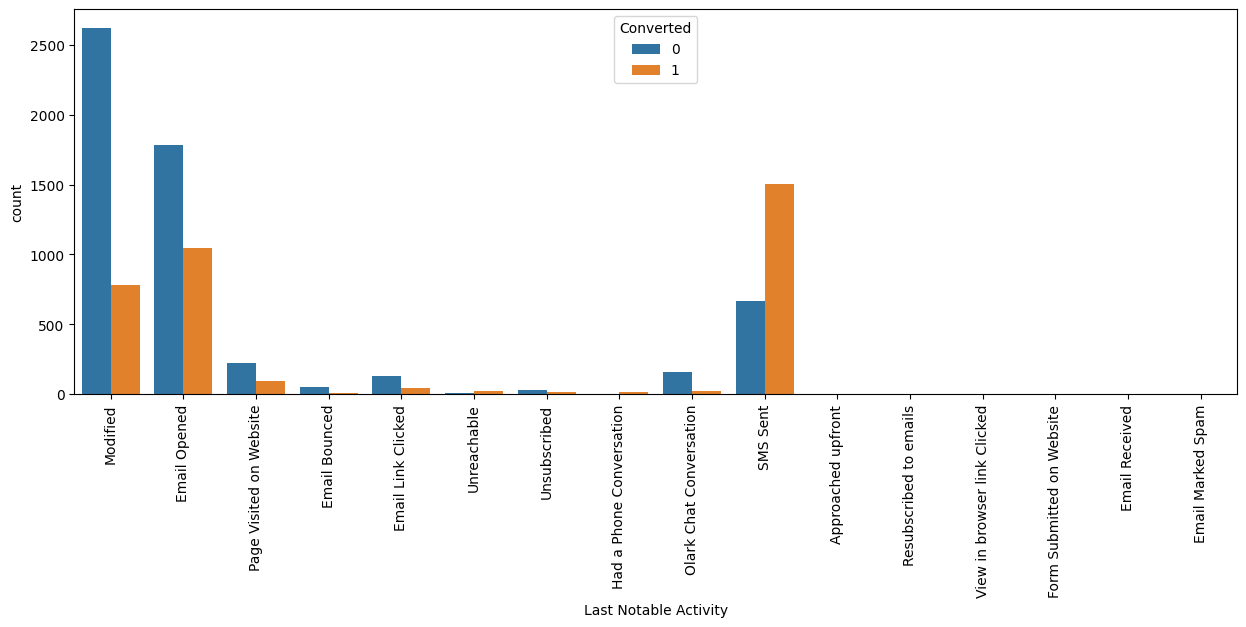

In [71]:
create_plot('Last Notable Activity')

In [72]:
# Append the column name in empty list to drop it
cols_to_remove.append("Last Notable Activity")

**Conclusion:**
1. It is not adding much values to the analysis, we can remove this column.

##### Since we have replaced the null values from many variables, we will check the percentage of null values of the variables 

In [73]:
# Identify the null values as a percentage.
print(lead_data.isnull().sum()*100/len(lead_data))

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

- As we can see, almost all the null values are taken care of, yet some null values are present in the "TotalVisits" and "Page Views Per Visit" variables.
- We will remove these null values.

In [74]:
lead_data = lead_data.dropna()

In [75]:
# Identify the null values as a percentage.
print(lead_data.isnull().sum()*100/len(lead_data))

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

- All the null values are removed.

- There are many columns with values "Yes" and "No".
- We will check those columns.

In [76]:
yes_no_columns = []
for col in lead_data.columns:
    if lead_data[col].isin(['Yes', 'No', 'yes', 'no']).any():
        yes_no_columns.append(col)
        unique_values = lead_data[col].unique()
        print(f"'{col}': {unique_values}")
    else:
        pass

'Do Not Email': ['No' 'Yes']
'Do Not Call': ['No' 'Yes']
'Search': ['No' 'Yes']
'Magazine': ['No']
'Newspaper Article': ['No' 'Yes']
'X Education Forums': ['No' 'Yes']
'Newspaper': ['No' 'Yes']
'Digital Advertisement': ['No' 'Yes']
'Through Recommendations': ['No' 'Yes']
'Receive More Updates About Our Courses': ['No']
'Update me on Supply Chain Content': ['No']
'Get updates on DM Content': ['No']
'I agree to pay the amount through cheque': ['No']
'A free copy of Mastering The Interview': ['No' 'Yes']


In [77]:
print(yes_no_columns)

['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']


- Here we will check the value count, and if the column is imbalanced then we will remove the column.

In [78]:
imbalance_cols = {}
for col in yes_no_columns:
    
    counts = lead_data[col].value_counts()
    print(f"Values present in '{col}':\n {counts}")

    total_values = len(lead_data[col])
    print(f"Total values in '{col}': {total_values}")
    print("________________________________________________________________")

    # checking imbalance columns
    val_perc = round(counts/total_values*100, 2)
    if val_perc.max() > 90:
        imbalance_cols[col] = val_perc.to_dict()

        # append the column into list to remove it later
        cols_to_remove.append(col)
    else:
        pass

Values present in 'Do Not Email':
 No     8379
Yes     724
Name: Do Not Email, dtype: int64
Total values in 'Do Not Email': 9103
________________________________________________________________
Values present in 'Do Not Call':
 No     9101
Yes       2
Name: Do Not Call, dtype: int64
Total values in 'Do Not Call': 9103
________________________________________________________________
Values present in 'Search':
 No     9089
Yes      14
Name: Search, dtype: int64
Total values in 'Search': 9103
________________________________________________________________
Values present in 'Magazine':
 No    9103
Name: Magazine, dtype: int64
Total values in 'Magazine': 9103
________________________________________________________________
Values present in 'Newspaper Article':
 No     9101
Yes       2
Name: Newspaper Article, dtype: int64
Total values in 'Newspaper Article': 9103
________________________________________________________________
Values present in 'X Education Forums':
 No     9102
Yes     

- Imbalanced columns

In [79]:
# imbalanced columns with the percentage
print("Imbalance ratio of the columns: \n")
for col, counts in imbalance_cols.items():
    print(f"{col}: {counts}")

Imbalance ratio of the columns: 

Do Not Email: {'No': 92.05, 'Yes': 7.95}
Do Not Call: {'No': 99.98, 'Yes': 0.02}
Search: {'No': 99.85, 'Yes': 0.15}
Magazine: {'No': 100.0}
Newspaper Article: {'No': 99.98, 'Yes': 0.02}
X Education Forums: {'No': 99.99, 'Yes': 0.01}
Newspaper: {'No': 99.99, 'Yes': 0.01}
Digital Advertisement: {'No': 99.96, 'Yes': 0.04}
Through Recommendations: {'No': 99.92, 'Yes': 0.08}
Receive More Updates About Our Courses: {'No': 100.0}
Update me on Supply Chain Content: {'No': 100.0}
Get updates on DM Content: {'No': 100.0}
I agree to pay the amount through cheque: {'No': 100.0}


In [80]:
lead_data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,other_tags,No,No,Mumbai,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,other_tags,No,No,Mumbai,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,No,No,other_tags,No,No,Thane & Outskirts,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,No,No,other_tags,No,No,Mumbai,No,No,Email Opened


- Since "Prospect ID" and "Lead Number" columns are not important for the analysis, we will remove these columns as well.

In [81]:
cols_to_remove.extend(['Prospect ID', 'Lead Number'])
print(cols_to_remove)

['Country', 'What matters most to you in choosing a course', 'Last Notable Activity', 'Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Prospect ID', 'Lead Number']


In [82]:
lead_data = lead_data.drop(cols_to_remove, 1)
lead_data.shape

(9103, 12)

### 2.3. - Numerical columns analysis

In [83]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  City                                    9103 non-null   obje

In [84]:
numerical_cols = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [85]:
# Function to create box plot
def create_box_plot(column_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=lead_data[column_name])
    plt.title(f"Box Plot of '{column_name}'")
    plt.xlabel(column_name)
    plt.ylabel('Values')
    return plt.show()

- Created a list of numerical variables.
- Created a function to create box plot.

- Check the correlation matrix of numerical columns

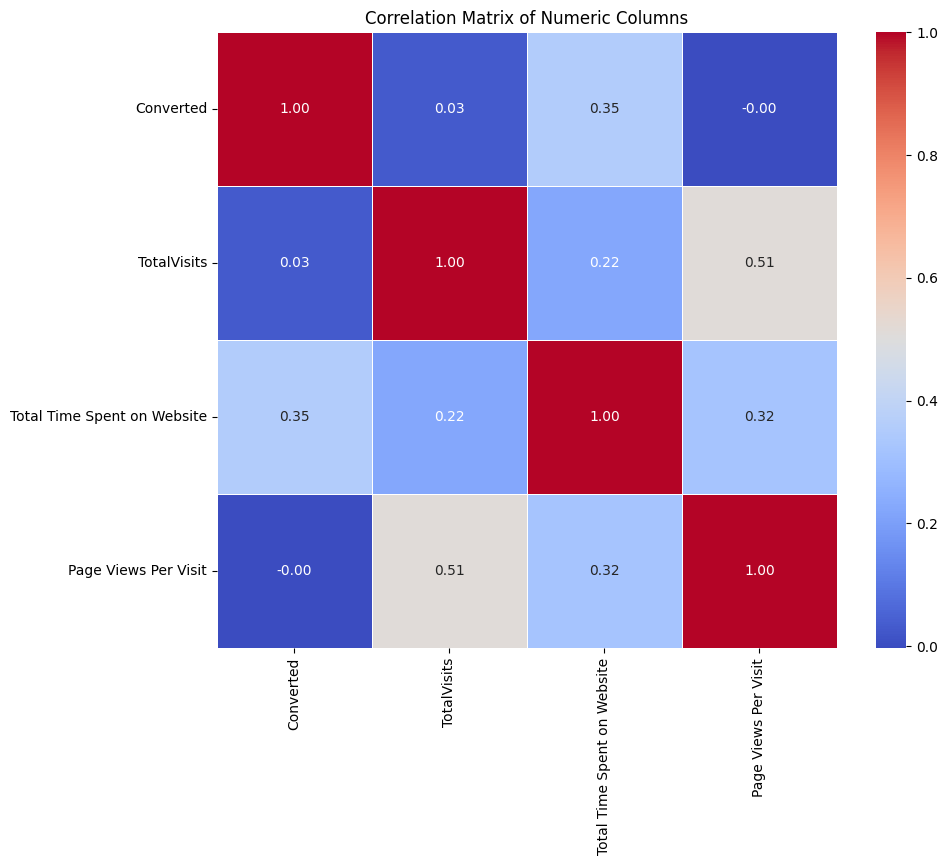

In [86]:
# Calculate the correlation matrix
correlation_matrix = lead_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

**1. Converted**

In [87]:
lead_data['Converted'].describe()

count    9103.000000
mean        0.380204
std         0.485464
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

In [88]:
lead_data['Converted'].value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [89]:
print(f"The percentage of the converted: {((lead_data['Converted'] == 1).sum() / len(lead_data['Converted'])) * 100}")

The percentage of the converted: 38.02043282434362


**2. TotalVisits**

In [90]:
lead_data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [91]:
lead_data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

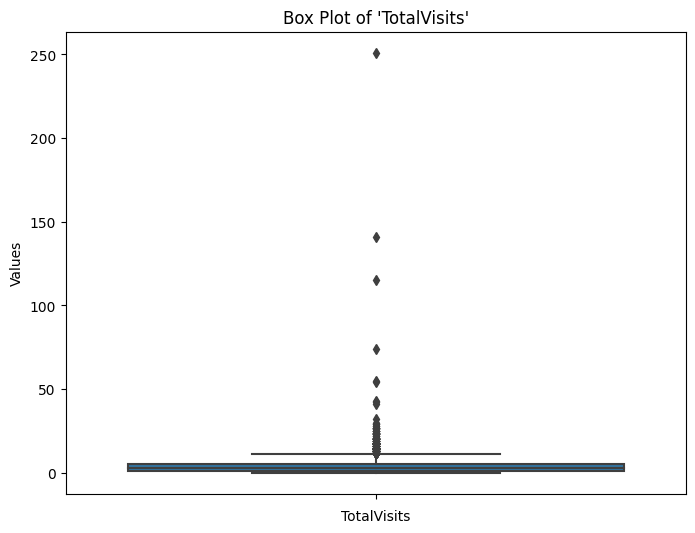

In [92]:
create_box_plot('TotalVisits')

- As we can see, there are outliers that need to be handled.
- Here, we will use the winsorization method, which handles outliers by capping extreme values at a specified percentile.

In [93]:
# Calculate the 5th and 95th percentiles of the 'TotalVisits' column
percentiles = lead_data['TotalVisits'].quantile([0.05, 0.95]).values

# Cap outliers by replacing values below the 5th percentile with the 5th percentile value
lead_data.loc[lead_data['TotalVisits'] <= percentiles[0], 'TotalVisits'] = percentiles[0]

# Cap outliers by replacing values above the 95th percentile with the 95th percentile value
lead_data.loc[lead_data['TotalVisits'] >= percentiles[1], 'TotalVisits'] = percentiles[1]

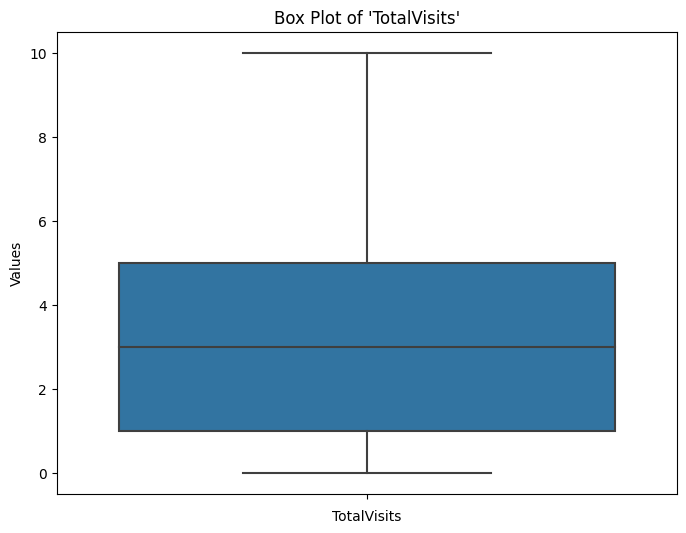

In [94]:
create_box_plot('TotalVisits')

**3. Total Time Spent on Website**

In [95]:
lead_data['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [96]:
lead_data['Total Time Spent on Website'].value_counts()

0       2193
60        19
127       18
75        18
74        17
        ... 
609        1
1035       1
802        1
840        1
927        1
Name: Total Time Spent on Website, Length: 1717, dtype: int64

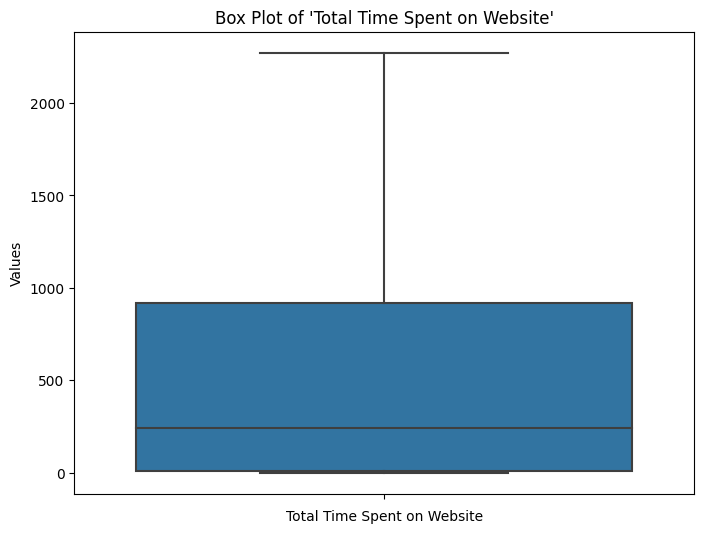

In [97]:
create_box_plot('Total Time Spent on Website')

- As we can see there are no outliers

**4. Page Views Per Visit**

In [98]:
lead_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [99]:
lead_data['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

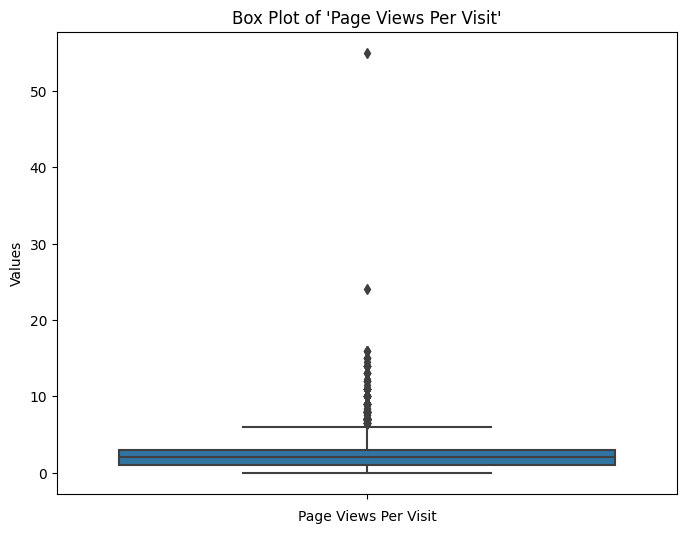

In [100]:
create_box_plot('Page Views Per Visit')

- As we can see, there are outliers that need to be handled.
- Here, we will use the winsorization method, which handles outliers by capping extreme values at a specified percentile.

In [101]:
# Calculate the 5th and 95th percentiles of the 'TotalVisits' column
percentiles = lead_data['Page Views Per Visit'].quantile([0.05, 0.95]).values

# Cap outliers by replacing values below the 5th percentile with the 5th percentile value
lead_data.loc[lead_data['Page Views Per Visit'] <= percentiles[0], 'Page Views Per Visit'] = percentiles[0]

# Cap outliers by replacing values above the 95th percentile with the 95th percentile value
lead_data.loc[lead_data['Page Views Per Visit'] >= percentiles[1], 'Page Views Per Visit'] = percentiles[1]

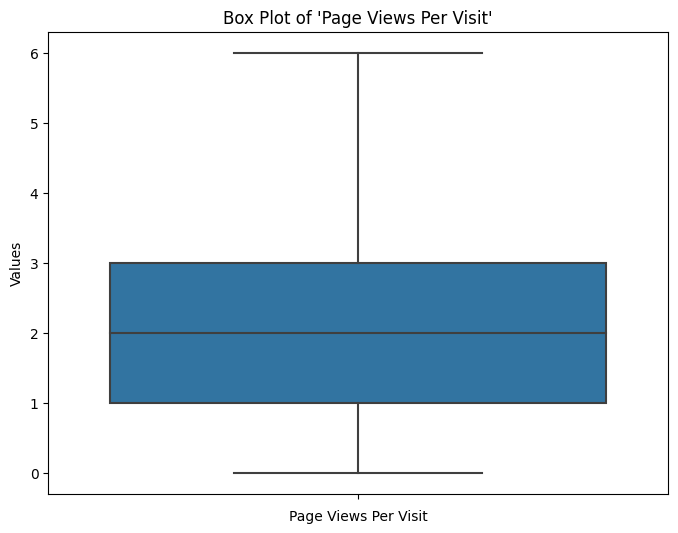

In [102]:
create_box_plot('Page Views Per Visit')

- checking the correlation matrix of the numerical columns

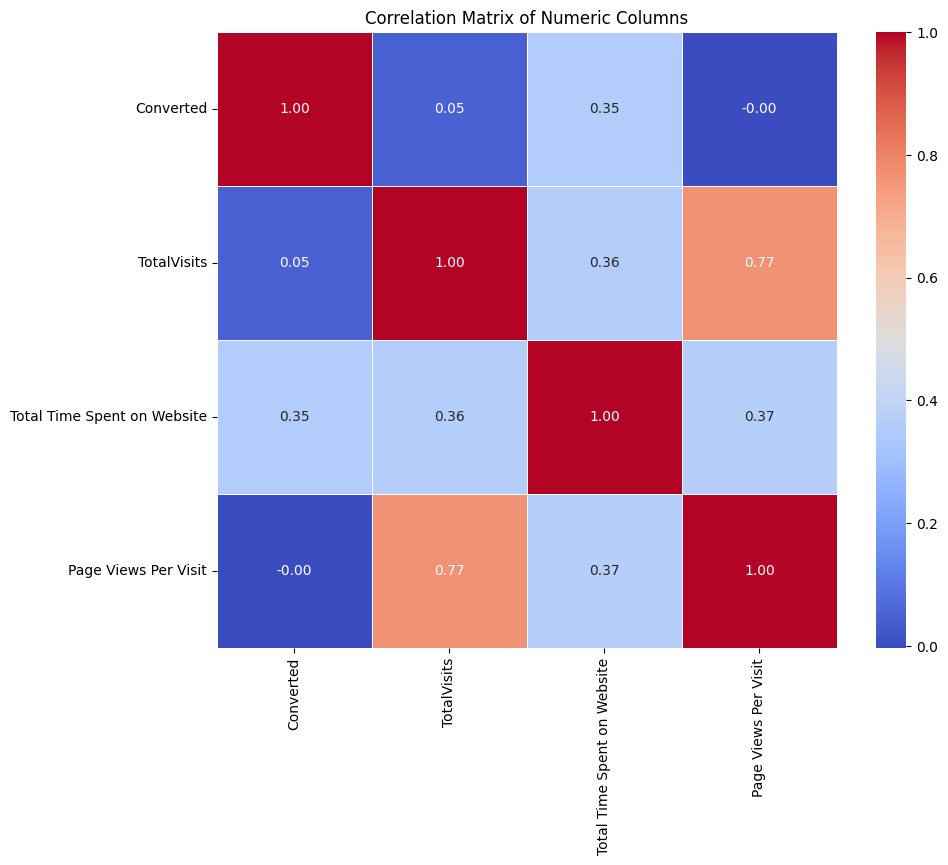

In [103]:
# Calculate the correlation matrix
correlation_matrix = lead_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# 3. Preparing data for modeling

#### 3.1. Create dummy variables

In [104]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  City                                    9103 non-null   obje

- Making a list of catagorical columns

In [105]:
catagorical_cols = lead_data.select_dtypes(include=['object']).columns
catagorical_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [106]:
get_unique_vals(lead_data)

'Lead Origin': ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']

'Lead Source': ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google'
 'other_lead_sources' 'Reference']

'Converted': [0 1]

'TotalVisits': [ 0.  5.  2.  1.  4.  8. 10.  6.  3.  7.  9.]

'Total Time Spent on Website': [   0  674 1532 ...  603  483  927]

'Page Views Per Visit': [0.   2.5  2.   1.   4.   6.   2.67 5.   3.   1.33 1.5  3.5  2.33 5.5
 1.67 4.5  3.33 1.71 1.8  4.33 3.4  1.25 1.75 2.63 2.25 3.67 1.43 2.6
 4.75 1.27 3.25 5.33 2.57 2.17 2.75 2.8  2.2  2.86 3.91 1.4  5.67 3.2
 1.38 2.09 2.4  5.25 3.57 2.22 1.83 3.6  1.2  1.57 1.56 5.4  4.25 1.31
 1.6  2.9  1.23 1.78 3.83 1.14 2.71 1.45 2.38 1.86 2.29 1.21 3.43 2.56
 1.64 4.4  3.17 1.48 1.22 3.75 1.54 2.13 2.14 2.45 3.29 4.17 1.63 3.38
 1.17 3.8  1.19 3.82 2.83 1.93 2.08]

'Last Activity': ['Page Visited on Website' 'Email Opened' 'others' 'Converted to Lead'
 'Olark Chat Conversation' 'Email Bounced' 'Email Link Clicked'
 'Form Submitted on Websi

**1. Lead Origin**

In [107]:
lead_data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

In [108]:
# Create dummy variable
Lead_origin = pd.get_dummies(lead_data['Lead Origin'], prefix='lead_origin')

# Drop least correlated column manually
Lead_origin = Lead_origin.drop(columns=['lead_origin_Lead Add Form'], axis=1)

#Concating the dummy variables with the original data
lead_data = pd.concat([lead_data, Lead_origin], axis=1)

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  City                                    9103 non-null   obje

**2. Lead Source**

In [109]:
# Create dummy variable
Lead_Source = pd.get_dummies(lead_data['Lead Source'], prefix='lead_source')

# Drop least correlated column manually
Lead_Source = Lead_Source.drop(columns=['lead_source_other_lead_sources'], axis=1)

#Concating the dummy variables with the original data
lead_data = pd.concat([lead_data, Lead_Source], axis=1)

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  City                                    9103 non-null   obje

**3. Last Activity**

In [110]:
# Create dummy variable
Last_Activity = pd.get_dummies(lead_data['Last Activity'], prefix='last_activity')

# Drop least correlated column manually
Last_Activity = Last_Activity.drop(columns=['last_activity_others'], axis=1)

#Concating the dummy variables with the original data
lead_data = pd.concat([lead_data, Last_Activity], axis=1)

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Lead Origin                              9103 non-null   object 
 1   Lead Source                              9103 non-null   object 
 2   Converted                                9103 non-null   int64  
 3   TotalVisits                              9103 non-null   float64
 4   Total Time Spent on Website              9103 non-null   int64  
 5   Page Views Per Visit                     9103 non-null   float64
 6   Last Activity                            9103 non-null   object 
 7   Specialization                           9103 non-null   object 
 8   What is your current occupation          9103 non-null   object 
 9   Tags                                     9103 non-null   object 
 10  City                                     9103 no

**4. Specialization**

In [111]:
# Create dummy variable
Specialization = pd.get_dummies(lead_data['Specialization'], prefix='specialization')

# Drop least correlated column manually
Specialization = Specialization.drop(columns=['specialization_Services Excellence'], axis=1)

#Concating the dummy variables with the original data
lead_data = pd.concat([lead_data, Specialization ], axis=1)

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Origin                                       9103 non-null   object 
 1   Lead Source                                       9103 non-null   object 
 2   Converted                                         9103 non-null   int64  
 3   TotalVisits                                       9103 non-null   float64
 4   Total Time Spent on Website                       9103 non-null   int64  
 5   Page Views Per Visit                              9103 non-null   float64
 6   Last Activity                                     9103 non-null   object 
 7   Specialization                                    9103 non-null   object 
 8   What is your current occupation                   9103 non-null   object 
 9   Tags               

**5. What is your current occupation**

In [112]:
# Create dummy variable
current_occupation = pd.get_dummies(lead_data['What is your current occupation'], prefix='current_occupation')

# Drop least correlated column manually
current_occupation = current_occupation.drop(columns=['current_occupation_Other'], axis=1)

#Concating the dummy variables with the original data
lead_data = pd.concat([lead_data, current_occupation ], axis=1)

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Origin                                       9103 non-null   object 
 1   Lead Source                                       9103 non-null   object 
 2   Converted                                         9103 non-null   int64  
 3   TotalVisits                                       9103 non-null   float64
 4   Total Time Spent on Website                       9103 non-null   int64  
 5   Page Views Per Visit                              9103 non-null   float64
 6   Last Activity                                     9103 non-null   object 
 7   Specialization                                    9103 non-null   object 
 8   What is your current occupation                   9103 non-null   object 
 9   Tags               

**6. City**

In [113]:
# Create dummy variable
City = pd.get_dummies(lead_data['City'], prefix='city')

# Drop least correlated column manually
City = City.drop(columns=['city_Tier II Cities'], axis=1)

#Concating the dummy variables with the original data
lead_data = pd.concat([lead_data, City ], axis=1)

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 48 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Origin                                       9103 non-null   object 
 1   Lead Source                                       9103 non-null   object 
 2   Converted                                         9103 non-null   int64  
 3   TotalVisits                                       9103 non-null   float64
 4   Total Time Spent on Website                       9103 non-null   int64  
 5   Page Views Per Visit                              9103 non-null   float64
 6   Last Activity                                     9103 non-null   object 
 7   Specialization                                    9103 non-null   object 
 8   What is your current occupation                   9103 non-null   object 
 9   Tags               

**7. A free copy of Mastering The Interview**

In [114]:
lead_data['A free copy of Mastering The Interview'] = lead_data['A free copy of Mastering The Interview'].replace({'Yes': 1, 'No': 0})
lead_data['A free copy of Mastering The Interview']

0       0
1       0
2       1
3       0
4       0
       ..
9235    0
9236    1
9237    1
9238    0
9239    1
Name: A free copy of Mastering The Interview, Length: 9103, dtype: int64

- After concatinating the dummy variables into original dataset, we can remove the original categorical columns.


**8. Tags**

In [115]:
# Create dummy variable
Tags = pd.get_dummies(lead_data['Tags'], prefix='tags')

# Drop least correlated column manually
Tags = Tags.drop(columns=['tags_Want to take admission but has financial problems'], axis=1)

#Concating the dummy variables with the original data
lead_data = pd.concat([lead_data, Tags], axis=1)

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 54 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Origin                                       9103 non-null   object 
 1   Lead Source                                       9103 non-null   object 
 2   Converted                                         9103 non-null   int64  
 3   TotalVisits                                       9103 non-null   float64
 4   Total Time Spent on Website                       9103 non-null   int64  
 5   Page Views Per Visit                              9103 non-null   float64
 6   Last Activity                                     9103 non-null   object 
 7   Specialization                                    9103 non-null   object 
 8   What is your current occupation                   9103 non-null   object 
 9   Tags               

In [116]:
lead_data = lead_data.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'City', 'Tags'], axis=1)
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 47 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         9103 non-null   int64  
 1   TotalVisits                                       9103 non-null   float64
 2   Total Time Spent on Website                       9103 non-null   int64  
 3   Page Views Per Visit                              9103 non-null   float64
 4   A free copy of Mastering The Interview            9103 non-null   int64  
 5   lead_origin_API                                   9103 non-null   uint8  
 6   lead_origin_Landing Page Submission               9103 non-null   uint8  
 7   lead_origin_Lead Import                           9103 non-null   uint8  
 8   lead_source_Direct Traffic                        9103 non-null   uint8  
 9   lead_source_Google 

- Replacing the space in column name for better understanding

In [117]:
lead_data.columns = lead_data.columns.str.replace(' ', '_')
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 47 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         9103 non-null   int64  
 1   TotalVisits                                       9103 non-null   float64
 2   Total_Time_Spent_on_Website                       9103 non-null   int64  
 3   Page_Views_Per_Visit                              9103 non-null   float64
 4   A_free_copy_of_Mastering_The_Interview            9103 non-null   int64  
 5   lead_origin_API                                   9103 non-null   uint8  
 6   lead_origin_Landing_Page_Submission               9103 non-null   uint8  
 7   lead_origin_Lead_Import                           9103 non-null   uint8  
 8   lead_source_Direct_Traffic                        9103 non-null   uint8  
 9   lead_source_Google 

In [118]:
get_unique_vals(lead_data)

'Converted': [0 1]

'TotalVisits': [ 0.  5.  2.  1.  4.  8. 10.  6.  3.  7.  9.]

'Total_Time_Spent_on_Website': [   0  674 1532 ...  603  483  927]

'Page_Views_Per_Visit': [0.   2.5  2.   1.   4.   6.   2.67 5.   3.   1.33 1.5  3.5  2.33 5.5
 1.67 4.5  3.33 1.71 1.8  4.33 3.4  1.25 1.75 2.63 2.25 3.67 1.43 2.6
 4.75 1.27 3.25 5.33 2.57 2.17 2.75 2.8  2.2  2.86 3.91 1.4  5.67 3.2
 1.38 2.09 2.4  5.25 3.57 2.22 1.83 3.6  1.2  1.57 1.56 5.4  4.25 1.31
 1.6  2.9  1.23 1.78 3.83 1.14 2.71 1.45 2.38 1.86 2.29 1.21 3.43 2.56
 1.64 4.4  3.17 1.48 1.22 3.75 1.54 2.13 2.14 2.45 3.29 4.17 1.63 3.38
 1.17 3.8  1.19 3.82 2.83 1.93 2.08]

'A_free_copy_of_Mastering_The_Interview': [0 1]

'lead_origin_API': [1 0]

'lead_origin_Landing_Page_Submission': [0 1]

'lead_origin_Lead_Import': [0 1]

'lead_source_Direct_Traffic': [0 1]

'lead_source_Google': [0 1]

'lead_source_Olark_Chat': [1 0]

'lead_source_Organic_Search': [0 1]

'lead_source_Reference': [0 1]

'last_activity_Converted_to_Lead': [0 1]



#### 3.2. Split data into train and test datasets

In [119]:
X=lead_data.drop('Converted', axis=1)
X.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,lead_origin_API,lead_origin_Landing_Page_Submission,lead_origin_Lead_Import,lead_source_Direct_Traffic,lead_source_Google,lead_source_Olark_Chat,...,city_Other_Cities,city_Other_Cities_of_Maharashtra,city_Other_Metro_Cities,city_Thane_&_Outskirts,tags_Already_a_student,tags_Closed_by_Horizzon,tags_Interested_in_other_courses,tags_Ringing,tags_Will_revert_after_reading_the_email,tags_other_tags
0,0.0,0,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,1532,2.0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,305,1.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [120]:
y = lead_data['Converted']
y.head

<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9103, dtype: int64>

- Splitting data set into train and test

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 46 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   TotalVisits                                       6372 non-null   float64
 1   Total_Time_Spent_on_Website                       6372 non-null   int64  
 2   Page_Views_Per_Visit                              6372 non-null   float64
 3   A_free_copy_of_Mastering_The_Interview            6372 non-null   int64  
 4   lead_origin_API                                   6372 non-null   uint8  
 5   lead_origin_Landing_Page_Submission               6372 non-null   uint8  
 6   lead_origin_Lead_Import                           6372 non-null   uint8  
 7   lead_source_Direct_Traffic                        6372 non-null   uint8  
 8   lead_source_Google                                6372 non-null   uint8  
 9   lead_source_Olar

In [123]:
get_unique_vals(X_train)

'TotalVisits': [ 3.  7.  5. 10.  0.  4.  2.  1.  8.  6.  9.]

'Total_Time_Spent_on_Website': [1286   60  169 ...  857  841 1859]

'Page_Views_Per_Visit': [1.5  6.   2.5  3.5  0.   1.33 2.   5.   4.   1.   3.   2.67 1.75 1.25
 2.38 1.4  1.71 2.2  1.67 1.64 2.33 2.75 1.8  2.17 1.48 5.5  1.2  3.33
 4.75 3.6  4.5  3.82 3.67 2.8  1.31 4.33 2.09 2.6  3.25 2.25 2.63 1.23
 3.43 2.71 2.56 1.86 1.6  2.86 1.38 2.29 2.45 1.43 1.14 5.25 2.22 3.75
 3.4  1.78 1.22 1.93 1.83 1.17 2.4  2.13 2.14 4.4  1.27 5.4  1.57 4.25
 1.21 3.83 5.67 2.9  2.83 3.17 2.08 3.91 5.33 3.57 1.56 1.63 3.38]

'A_free_copy_of_Mastering_The_Interview': [0 1]

'lead_origin_API': [0 1]

'lead_origin_Landing_Page_Submission': [1 0]

'lead_origin_Lead_Import': [0 1]

'lead_source_Direct_Traffic': [0 1]

'lead_source_Google': [1 0]

'lead_source_Olark_Chat': [0 1]

'lead_source_Organic_Search': [0 1]

'lead_source_Reference': [0 1]

'last_activity_Converted_to_Lead': [0 1]

'last_activity_Email_Bounced': [0 1]

'last_activity_Email

- Scalling the features


In [124]:
# - Scalling the features
scaler = StandardScaler()

# Fit on data
X_train[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total_Time_Spent_on_Website', 
                                                                                                                'Page_Views_Per_Visit']])

X_train.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,lead_origin_API,lead_origin_Landing_Page_Submission,lead_origin_Lead_Import,lead_source_Direct_Traffic,lead_source_Google,lead_source_Olark_Chat,...,city_Other_Cities,city_Other_Cities_of_Maharashtra,city_Other_Metro_Cities,city_Thane_&_Outskirts,tags_Already_a_student,tags_Closed_by_Horizzon,tags_Interested_in_other_courses,tags_Ringing,tags_Will_revert_after_reading_the_email,tags_other_tags
7962,-0.068258,1.476324,-0.423364,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5520,1.362470,-0.771066,2.083179,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1962,0.647106,-0.571257,0.133646,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1566,2.435517,1.393834,0.690655,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9170,-1.141305,-0.881052,-1.258878,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


# 4. Train the model


- Here, we will build the model using Stats model.
- We will go with the RFE approach to select the best 15 features for the model.

In [125]:
lr_rfe = LogisticRegression()

rfe = RFE(estimator=lr_rfe, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [126]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 9),
 ('A_free_copy_of_Mastering_The_Interview', False, 20),
 ('lead_origin_API', True, 1),
 ('lead_origin_Landing_Page_Submission', True, 1),
 ('lead_origin_Lead_Import', True, 1),
 ('lead_source_Direct_Traffic', False, 2),
 ('lead_source_Google', False, 3),
 ('lead_source_Olark_Chat', False, 10),
 ('lead_source_Organic_Search', True, 1),
 ('lead_source_Reference', True, 1),
 ('last_activity_Converted_to_Lead', False, 5),
 ('last_activity_Email_Bounced', True, 1),
 ('last_activity_Email_Link_Clicked', False, 30),
 ('last_activity_Email_Opened', False, 4),
 ('last_activity_Form_Submitted_on_Website', False, 31),
 ('last_activity_Olark_Chat_Conversation', True, 1),
 ('last_activity_Page_Visited_on_Website', False, 8),
 ('last_activity_SMS_Sent', True, 1),
 ('specialization_Banking,_Investment_And_Insurance', False, 18),
 ('specialization_Business_Administration', False, 28),
 ('specia

In [127]:
# Printing the RFE supported columns
rfe_supported_cols = X_train.columns[rfe.support_]
rfe_supported_cols

Index(['Total_Time_Spent_on_Website', 'lead_origin_API',
       'lead_origin_Landing_Page_Submission', 'lead_origin_Lead_Import',
       'lead_source_Organic_Search', 'lead_source_Reference',
       'last_activity_Email_Bounced', 'last_activity_Olark_Chat_Conversation',
       'last_activity_SMS_Sent', 'current_occupation_Working_Professional',
       'tags_Already_a_student', 'tags_Closed_by_Horizzon',
       'tags_Interested_in_other_courses', 'tags_Ringing',
       'tags_Will_revert_after_reading_the_email'],
      dtype='object')

In [128]:
# Printing the RFE rejected columns
rfe_rejected_cols = X_train.columns[~rfe.support_]
rfe_rejected_cols

Index(['TotalVisits', 'Page_Views_Per_Visit',
       'A_free_copy_of_Mastering_The_Interview', 'lead_source_Direct_Traffic',
       'lead_source_Google', 'lead_source_Olark_Chat',
       'last_activity_Converted_to_Lead', 'last_activity_Email_Link_Clicked',
       'last_activity_Email_Opened', 'last_activity_Form_Submitted_on_Website',
       'last_activity_Page_Visited_on_Website',
       'specialization_Banking,_Investment_And_Insurance',
       'specialization_Business_Administration', 'specialization_E-Business',
       'specialization_E-COMMERCE', 'specialization_International_Business',
       'specialization_Media_and_Advertising',
       'specialization_Rural_and_Agribusiness',
       'specialization_Travel_and_Tourism',
       'specialization_management_specialization',
       'specialization_not_selected', 'current_occupation_Businessman',
       'current_occupation_Housewife', 'current_occupation_Student',
       'current_occupation_Unemployed', 'city_Mumbai', 'city_Other_Ci

**1st Model**

In [129]:
# Adding the constant
X_train_model = sm.add_constant(X_train[rfe_supported_cols])

# Creating the model
lr_sm1 = sm.GLM(y_train,X_train_model, family = sm.families.Binomial())

# fit the model
lr_sm_model = lr_sm1.fit()

#parameters of the model
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1593.9
Date:                Sun, 25 Feb 2024   Deviance:                       3187.9
Time:                        19:52:20   Pearson chi2:                 7.14e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5628
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.1351      0.526      5.962      0.000       2.104       4.166
Total_Time_Spent_on_Website                  0.9520      0.048     19.841      0.000       0.858       1.046
lead_origin_API                             -4.1970      0.530     -7.925      0.000      -5.235      -3.159
lead_origin_Landing_Page_Submission         -5.1595      0.531     -9.713      0.000      -6.201      -4.118
lead_origin_Lead_Import                     -4.2089      0.867     -4.856      0.000      -5.908      -2.510
lead_source_Organic_Search                  -0.3064      0.136     -2.257      0.024      -0.572      -0.040
lead_source_Reference                       -3.0068      0.662     -4.543      0.000      -4.304      -1.709
last_activity_Email_Bounced                 -1.5295      0.375     -4.081      0.000      -2.264      -0.795
last_activity_Olark_Chat_Conversation       -1.3117      0.206     -6.362      0.000      -1.716      -0.908
last_activity_SMS_Sent                       1.4834      0.100     14.822      0.000       1.287       1.680
current_occupation_Working_Professional      0.9964      0.320      3.113      0.002       0.369       1.624
tags_Already_a_student                      -2.9856      0.591     -5.051      0.000      -4.144      -1.827
tags_Closed_by_Horizzon                      5.8086      0.724      8.019      0.000       4.389       7.228
tags_Interested_in_other_courses            -2.4992      0.359     -6.957      0.000      -3.203      -1.795
tags_Ringing                                -2.9062      0.234    -12.423      0.000      -3.365      -2.448
tags_Will_revert_after_reading_the_email     4.2890      0.179     24.016      0.000       3.939       4.639
============================================================================================================
"""

- we will drop "lead_source_Organic_Search" variable due to high p-value 

**2nd Model**

In [130]:
rfe_supported_cols = rfe_supported_cols.drop('lead_source_Organic_Search', 1)

In [131]:
# Adding the constant
X_train_model = sm.add_constant(X_train[rfe_supported_cols])

# Creating the model
lr_sm2 = sm.GLM(y_train,X_train_model, family = sm.families.Binomial())

# fit the model
lr_sm_model = lr_sm2.fit()

#parameters of the model
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1596.5
Date:                Sun, 25 Feb 2024   Deviance:                       3193.1
Time:                        19:52:20   Pearson chi2:                 7.14e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5625
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.1326      0.526      5.956      0.000       2.102       4.163
Total_Time_Spent_on_Website                  0.9416      0.048     19.755      0.000       0.848       1.035
lead_origin_API                             -4.2369      0.529     -8.003      0.000      -5.275      -3.199
lead_origin_Landing_Page_Submission         -5.1870      0.531     -9.766      0.000      -6.228      -4.146
lead_origin_Lead_Import                     -4.2058      0.866     -4.857      0.000      -5.903      -2.509
lead_source_Reference                       -2.9998      0.662     -4.533      0.000      -4.297      -1.703
last_activity_Email_Bounced                 -1.5542      0.375     -4.140      0.000      -2.290      -0.818
last_activity_Olark_Chat_Conversation       -1.2953      0.206     -6.286      0.000      -1.699      -0.891
last_activity_SMS_Sent                       1.4701      0.100     14.737      0.000       1.275       1.666
current_occupation_Working_Professional      1.0057      0.321      3.135      0.002       0.377       1.634
tags_Already_a_student                      -2.9686      0.591     -5.026      0.000      -4.126      -1.811
tags_Closed_by_Horizzon                      5.7904      0.724      8.001      0.000       4.372       7.209
tags_Interested_in_other_courses            -2.4957      0.359     -6.952      0.000      -3.199      -1.792
tags_Ringing                                -2.9178      0.234    -12.475      0.000      -3.376      -2.459
tags_Will_revert_after_reading_the_email     4.2708      0.178     23.998      0.000       3.922       4.620
============================================================================================================
"""

- Now we will check VIF

In [132]:
# Function to check VIF
def check_vif(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [133]:
check_vif(X_train[rfe_supported_cols])

,Features,VIF
2,lead_origin_Landing_Page_Submission,2.03
13,tags_Will_revert_after_reading_the_email,1.97
1,lead_origin_API,1.81
7,last_activity_SMS_Sent,1.63
4,lead_source_Reference,1.51
6,last_activity_Olark_Chat_Conversation,1.39
8,current_occupation_Working_Professional,1.32
12,tags_Ringing,1.31
0,Total_Time_Spent_on_Website,1.25
10,tags_Closed_by_Horizzon,1.25


- We will remove teh "lead_origin_Landing_Page_Submission" due to high VIF

**3rd Model**

In [134]:
rfe_supported_cols = rfe_supported_cols.drop('lead_origin_Landing_Page_Submission', 1)

In [135]:
# Adding the constant
X_train_model = sm.add_constant(X_train[rfe_supported_cols])

# Creating the model
lr_sm3 = sm.GLM(y_train,X_train_model, family = sm.families.Binomial())

# fit the model
lr_sm_model = lr_sm3.fit()

#parameters of the model
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1734.6
Date:                Sun, 25 Feb 2024   Deviance:                       3469.2
Time:                        19:52:21   Pearson chi2:                 6.79e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5431
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7528      0.077    -22.645      0.000      -1.905      -1.601
Total_Time_Spent_on_Website                  0.7698      0.045     17.189      0.000       0.682       0.858
lead_origin_API                              0.6154      0.095      6.488      0.000       0.430       0.801
lead_origin_Lead_Import                      0.5248      0.683      0.768      0.442      -0.814       1.864
lead_source_Reference                        1.7873      0.405      4.408      0.000       0.993       2.582
last_activity_Email_Bounced                 -1.5704      0.364     -4.314      0.000      -2.284      -0.857
last_activity_Olark_Chat_Conversation       -1.3020      0.201     -6.483      0.000      -1.696      -0.908
last_activity_SMS_Sent                       1.5613      0.095     16.499      0.000       1.376       1.747
current_occupation_Working_Professional      0.8973      0.312      2.880      0.004       0.287       1.508
tags_Already_a_student                      -3.0430      0.587     -5.186      0.000      -4.193      -1.893
tags_Closed_by_Horizzon                      5.7779      0.723      7.990      0.000       4.361       7.195
tags_Interested_in_other_courses            -2.4942      0.354     -7.045      0.000      -3.188      -1.800
tags_Ringing                                -3.0596      0.231    -13.246      0.000      -3.512      -2.607
tags_Will_revert_after_reading_the_email     4.1172      0.176     23.434      0.000       3.773       4.462
============================================================================================================
"""

In [136]:
check_vif(X_train[rfe_supported_cols])

,Features,VIF
12,tags_Will_revert_after_reading_the_email,1.76
1,lead_origin_API,1.57
6,last_activity_SMS_Sent,1.42
3,lead_source_Reference,1.40
5,last_activity_Olark_Chat_Conversation,1.35
7,current_occupation_Working_Professional,1.32
0,Total_Time_Spent_on_Website,1.24
9,tags_Closed_by_Horizzon,1.19
11,tags_Ringing,1.10
10,tags_Interested_in_other_courses,1.07


- Here, we will try removing "lead_origin_Lead_Import" variable and build the model again.

**4th Model**

In [137]:
rfe_supported_cols = rfe_supported_cols.drop('lead_origin_Lead_Import', 1)

In [138]:
# Adding the constant
X_train_model = sm.add_constant(X_train[rfe_supported_cols])

# Creating the model
lr_sm4 = sm.GLM(y_train,X_train_model, family = sm.families.Binomial())

# fit the model
lr_sm_model = lr_sm4.fit()

#parameters of the model
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1734.9
Date:                Sun, 25 Feb 2024   Deviance:                       3469.8
Time:                        19:52:21   Pearson chi2:                 6.79e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5431
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7488      0.077    -22.659      0.000      -1.900      -1.598
Total_Time_Spent_on_Website                  0.7673      0.045     17.184      0.000       0.680       0.855
lead_origin_API                              0.6110      0.095      6.456      0.000       0.426       0.797
lead_source_Reference                        1.7792      0.405      4.388      0.000       0.984       2.574
last_activity_Email_Bounced                 -1.5730      0.364     -4.320      0.000      -2.287      -0.859
last_activity_Olark_Chat_Conversation       -1.3034      0.201     -6.488      0.000      -1.697      -0.910
last_activity_SMS_Sent                       1.5611      0.095     16.498      0.000       1.376       1.747
current_occupation_Working_Professional      0.8984      0.311      2.886      0.004       0.288       1.508
tags_Already_a_student                      -3.0442      0.587     -5.188      0.000      -4.194      -1.894
tags_Closed_by_Horizzon                      5.7757      0.723      7.988      0.000       4.358       7.193
tags_Interested_in_other_courses            -2.4935      0.354     -7.044      0.000      -3.187      -1.800
tags_Ringing                                -3.0594      0.231    -13.246      0.000      -3.512      -2.607
tags_Will_revert_after_reading_the_email     4.1229      0.176     23.469      0.000       3.779       4.467
============================================================================================================
"""

In [139]:
check_vif(X_train[rfe_supported_cols])

,Features,VIF
11,tags_Will_revert_after_reading_the_email,1.75
1,lead_origin_API,1.57
5,last_activity_SMS_Sent,1.42
2,lead_source_Reference,1.40
4,last_activity_Olark_Chat_Conversation,1.35
6,current_occupation_Working_Professional,1.32
0,Total_Time_Spent_on_Website,1.23
8,tags_Closed_by_Horizzon,1.19
10,tags_Ringing,1.10
9,tags_Interested_in_other_courses,1.07


- As we can see, the VIF is decreased significantly, and p-value is also less for the variables.
- Now we will derive the Probability on train data.

In [140]:
# Prediction on train set
y_train_pred = lr_sm_model.predict(X_train_model)
y_train_pred[:10]

7962    0.720138
5520    0.087827
1962    0.348410
1566    0.987157
9170    0.007706
5097    0.140176
8954    0.032965
309     0.887755
5519    0.437151
1050    0.961943
dtype: float64

In [141]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
7962,0,0.720138,7962
5520,0,0.087827,5520
1962,0,0.348410,1962
1566,1,0.987157,1566
9170,0,0.007706,9170


- Selecting an arbitrary cut-off probability point of 0.5 to determine the predicted labels.
- Creating a new column named 'predicted', assigning 1 if Converted_Prob > 0.5, otherwise 0.

In [142]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
7962,0,0.720138,7962,1
5520,0,0.087827,5520,0
1962,0,0.348410,1962,0
1566,1,0.987157,1566,1
9170,0,0.007706,9170,0


- Confusion matrix

In [143]:
confusion_metrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion_metrix)

[[3774  179]
 [ 543 1876]]


- The confusion matrix indicates the following:

In [144]:
# Predicted     not_converted    converted
# Actual
# not_converted        3774      444
# converted            543       1876

- The overall accuracy:

In [145]:
print('Accuracy:',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy: 0.886691776522285


In [146]:
TP = confusion_metrix[1,1] # true positive 
TN = confusion_metrix[0,0] # true negatives
FP = confusion_metrix[0,1] # false positives
FN = confusion_metrix[1,0] # false negatives

- Sensitivity

In [147]:
print("Sensitivity: ",TP / float(TP+FN))

Sensitivity:  0.7755270773046713


- Calculate specificity

In [148]:
print("Specificity: ",TN / float(TN+FP))

Specificity:  0.9547179357450037


- Calculate false postive rate

In [149]:
print("False Positive Rate:",FP/ float(TN+FP))

False Positive Rate: 0.04528206425499621


- Calculate positive predictive value

In [150]:
print("Positive Predictive Value: ",TP / float(TP+FP))

Positive Predictive Value:  0.9128953771289537


- Calculate negative predictive value

In [151]:
print ("Negative predictive value: ",TN / float(TN+ FN))

Negative predictive value:  0.8742182070882557


**ROC CURVE**

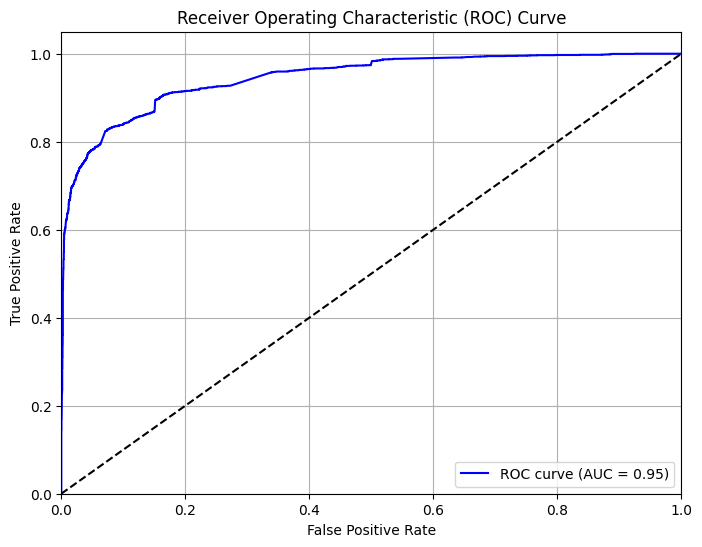

In [152]:
# Calculate the ROC curve and get false positive rate, true positive rate, and thresholds
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Calculate the AUC (Area Under the Curve) score
auc_score = metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (AUC = {:.2f})'.format(auc_score), color='b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


- The ROC curve value is 0.95 which is close to 1.

#### Precision and recall tradeoff

In [153]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(7962    0
 5520    0
 1962    0
 1566    1
 9170    0
        ..
 367     0
 82      1
 8173    1
 7055    1
 5734    0
 Name: Converted, Length: 6372, dtype: int64,
 7962    1
 5520    0
 1962    0
 1566    1
 9170    0
        ..
 367     0
 82      1
 8173    1
 7055    1
 5734    0
 Name: Predicted, Length: 6372, dtype: int64)

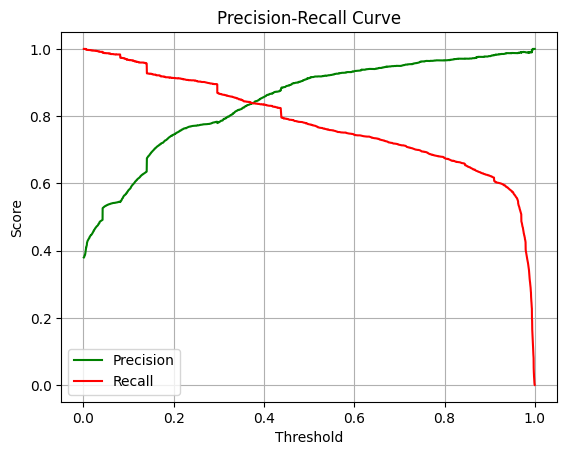

In [154]:
# Calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Plot precision-recall curve
plt.plot(thresholds, precision[:-1], "g-", label="Precision")
plt.plot(thresholds, recall[:-1], "r-", label="Recall")
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# 5. Prediction and evaluation on the test data

#### 5.1. Scalling the test data set

In [155]:
# Transform on data
X_test[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']] = scaler.transform(X_test[['TotalVisits', 'Total_Time_Spent_on_Website', 
                                                                                                                'Page_Views_Per_Visit']])

#### 5.2. Testing the model on test data set

In [156]:
# Assigning the columns supported by RFE to the X_test 
X_test = X_test[rfe_supported_cols]
X_test.head()

,Total_Time_Spent_on_Website,lead_origin_API,lead_source_Reference,last_activity_Email_Bounced,last_activity_Olark_Chat_Conversation,last_activity_SMS_Sent,current_occupation_Working_Professional,tags_Already_a_student,tags_Closed_by_Horizzon,tags_Interested_in_other_courses,tags_Ringing,tags_Will_revert_after_reading_the_email
3504,-0.103815,0,0,0,0,0,0,0,0,0,1,0
4050,-0.881052,0,1,0,0,1,0,0,0,0,0,1
7201,0.424120,0,0,0,0,1,0,0,0,0,0,0
1196,-0.105648,0,0,0,0,0,0,0,0,0,1,0
8219,-0.428274,0,0,0,0,0,0,0,0,0,0,0


In [157]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = lr_sm_model.predict(X_test_sm)
y_test_pred[:20]


3504    0.007481
4050    0.993557
7201    0.534384
1196    0.007471
8219    0.111311
8747    0.140176
9048    0.651406
6524    0.101295
7693    0.341419
8187    0.104895
3559    0.140176
6940    0.042402
8743    0.979572
2603    0.711266
7434    0.172347
4726    0.043865
3764    0.528079
6545    0.081613
6772    0.015001
6599    0.004175
dtype: float64

In [158]:
# Convert y_test_pred to a dataframe which is an array.
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.007481
4050,0.993557
7201,0.534384
1196,0.007471
8219,0.111311


In [159]:
# Convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
3504,0
4050,1
7201,0
1196,0
8219,1
...,...
6508,0
315,0
3766,0
8043,1


In [160]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [161]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.007481
1,1,4050,0.993557
2,0,7201,0.534384
3,0,1196,0.007471
4,1,8219,0.111311


In [163]:
# Rename the column
y_pred_final= y_pred_final.rename(columns={0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.007481
1,1,4050,0.993557
2,0,7201,0.534384
3,0,1196,0.007471
4,1,8219,0.111311


In [164]:
# Rearrange the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head(100)

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.007481,1
1,4050,1,0.993557,99
2,7201,0,0.534384,53
3,1196,0,0.007471,1
4,8219,1,0.111311,11
...,...,...,...,...
95,6181,0,0.010386,1
96,1375,0,0.004677,0
97,5321,0,0.005777,1
98,1525,0,0.395297,40


In [165]:
y_pred_final['Final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,Final_predicted
0,3504,0,0.007481,1,0
1,4050,1,0.993557,99,1
2,7201,0,0.534384,53,1
3,1196,0,0.007471,1,0
4,8219,1,0.111311,11,0


- Overall accuracy on test data set

In [166]:
print("Accuracy: ",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_predicted))

Accuracy:  0.8784328084950568


- Calculate confusion matrix on test data set

In [167]:
confusion_matrix2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_predicted )
confusion_matrix2

array([[1477,  212],
       [ 120,  922]])

In [168]:
TP = confusion_matrix2[1,1] # true positive 
TN = confusion_matrix2[0,0] # true negatives
FP = confusion_matrix2[0,1] # false positives
FN = confusion_matrix2[1,0] # false negatives

In [169]:
print("Sensitivity: ",TP / float(TP+FN))

Sensitivity:  0.8848368522072937


In [170]:
print("Specificity: ",TN / float(TN+FP))

Specificity:  0.8744819419775015


- Assign lead score to test data set

In [171]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,Final_predicted
0,3504,0,0.007481,1,0
1,4050,1,0.993557,99,1
2,7201,0,0.534384,53,1
3,1196,0,0.007471,1,0
4,8219,1,0.111311,11,0


#### **Conclusions:**
##### Upon executing the model on the test data, the following results were obtained:
    1. Accuracy: 87%
    2. Sensitivity: 88%
    3. Specificity: 87.44%

- Accuracy, Sensitivity, and Specificity values of the test set are around 87%, 88%, and 87.44%, respectively, which closely align with the respective values calculated using the trained set.